<a href="https://www.kaggle.com/code/tarikemre/pisa-scores-analysis?scriptVersionId=157559216" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pisa-performance-scores-by-country/OECD PISA data.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("/kaggle/input/pisa-performance-scores-by-country/OECD PISA data.csv")

In [4]:
df.to_csv('/kaggle/working/OECD PISA data.csv', index=False)

# Some SQL opreations & seperating

In [5]:
pisaMath = df[df["INDICATOR"] == "PISAMATH"][["LOCATION","Value"]]
pisaRead = df[df["INDICATOR"] == "PISAREAD"][["LOCATION","Value"]]
pisaScience = df[df["INDICATOR"] == "PISASCIENCE"][["LOCATION", "Value"]]

In [6]:
uniLoc = df[df["INDICATOR"] == "PISAMATH"]["LOCATION"].unique() #unique locations series
meansMath = []
meansRead = []
meansScience = []

# part 1 : Getting Started with simple graphs

# 1.1 Which Location has how many data

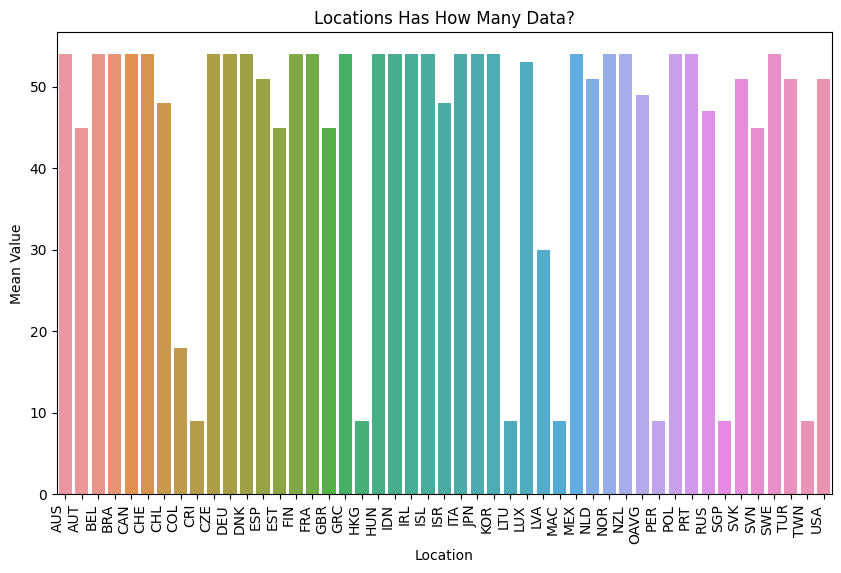

In [7]:
df_grouped = df.groupby('LOCATION')['Value'].count().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='LOCATION', y='Value', data=df_grouped)
plt.title('Locations Has How Many Data?')
plt.xlabel('Location')
plt.ylabel('Mean Value')
plt.xticks(rotation=90, ha='right')
plt.savefig('/kaggle/working/locationHasHowManyData.png')
plt.show()


In [8]:
pisaMathCount = df.loc[df["INDICATOR"] == "PISAMATH"]["INDICATOR"].count()
pisaReadCount = df.loc[df["INDICATOR"] == "PISAREAD"]["INDICATOR"].count()
pisaSciCount = df.loc[df["INDICATOR"] == "PISASCIENCE"]["INDICATOR"].count()

indicatorCategory = {"Indicators" : ['PISAMATH','PISAREAD','PISASCIENCE'], "Total Data" : [pisaMathCount,pisaReadCount,pisaSciCount]}

indicatorCategory = pd.DataFrame(indicatorCategory)

# 1.2 # of Total For Each Indicators on the Dataset

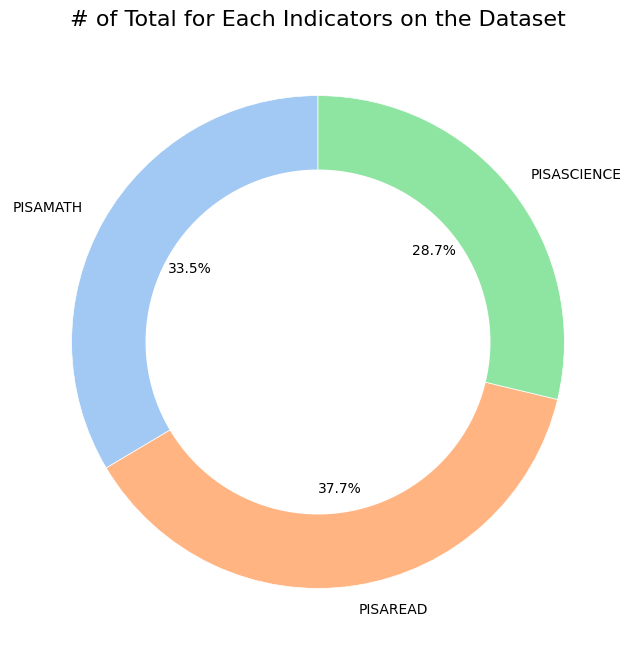

In [9]:
colors = sns.color_palette('pastel')[0:len(indicatorCategory['Indicators'])]


plt.figure(figsize=(8, 8))
plt.pie(indicatorCategory['Total Data'], labels=indicatorCategory['Indicators'], autopct='%1.1f%%', startangle=90, colors=colors,wedgeprops=dict(width=0.4))
plt.title('# of Total for Each Indicators on the Dataset', fontsize=16)


for w in plt.gca().patches:
    w.set_linewidth(0.5)
    w.set_edgecolor('white')
    
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig('/kaggle/working/numberOfTotalForEachIndicatorsOnTheDataset.png')
plt.show()


# 1.3 # of Total for Each Indicars with HeatMap

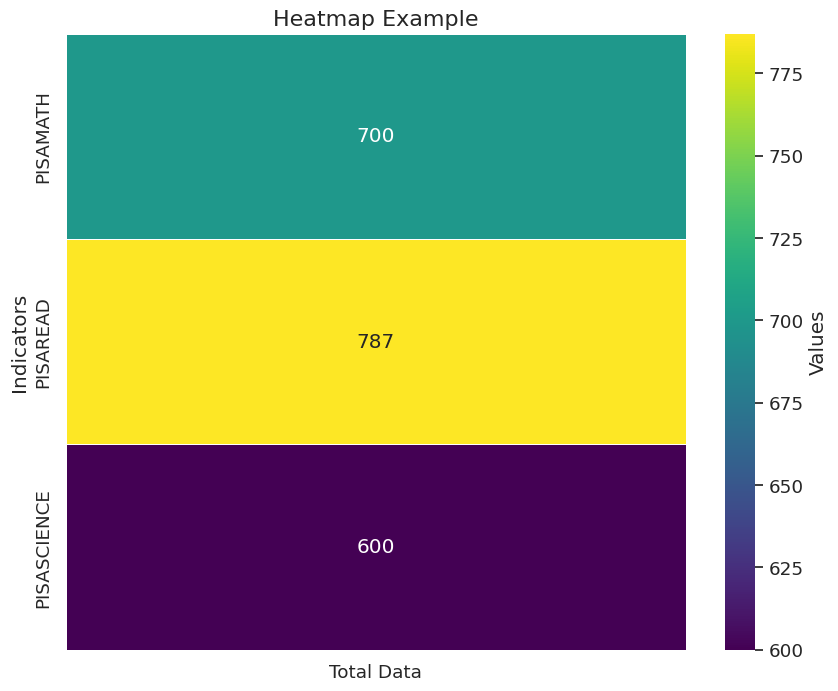

In [10]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(indicatorCategory.set_index('Indicators'), cmap='viridis', annot=True, fmt='g', linewidths=0.5, cbar_kws={'label': 'Values'})
plt.title('Heatmap Example', fontsize=16)
plt.savefig('/kaggle/working/heatMap.png')
plt.show()

# part 2 : MEAN VALUES IN ALL TIMES

# 2.1 Get mean value for each indicators by location

In [11]:
for i in uniLoc:
    mean = pisaMath[pisaMath["LOCATION"] == i]['Value'].mean()
    meansMath.append(mean)
    mean = pisaRead[pisaRead["LOCATION"] == i]["Value"].mean()
    meansRead.append(mean)
    mean = pisaScience[pisaScience["LOCATION"] == i]["Value"].mean()
    meansScience.append(mean)    

## Create New DataFrames for Each Indıcators

In [12]:

mathDf = pd.DataFrame(columns=['LOCATION', 'INDICATOR', 'Value'])


mathDf['LOCATION'] = uniLoc
mathDf['INDICATOR'] = "PISAMATH"
mathDf['Value'] = meansMath

readDf = pd.DataFrame(columns=['LOCATION', 'INDICATOR', 'Value'])


readDf['LOCATION'] = uniLoc
readDf['INDICATOR'] = "PISAREAD"
readDf['Value'] = meansRead

sciDf = pd.DataFrame(columns=['LOCATION', 'INDICATOR', 'Value'])


sciDf['LOCATION'] = uniLoc
sciDf['INDICATOR'] = "PISACIENCE"
sciDf['Value'] = meansScience




# 2.2 PISASCIENCE

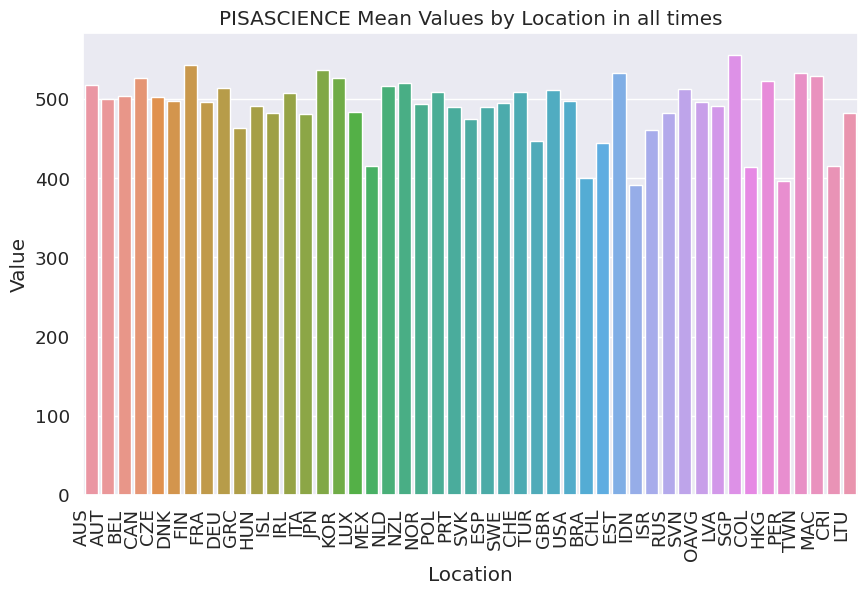

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='LOCATION', y='Value', data=sciDf)
plt.title('PISASCIENCE Mean Values by Location in all times')
plt.xlabel('Location')
plt.ylabel('Value')
plt.xticks(rotation=90, ha='right')
plt.savefig('/kaggle/working/PisaScienceMeanValuesByLocation.png')
plt.show()


# 2.3 PISAMATH

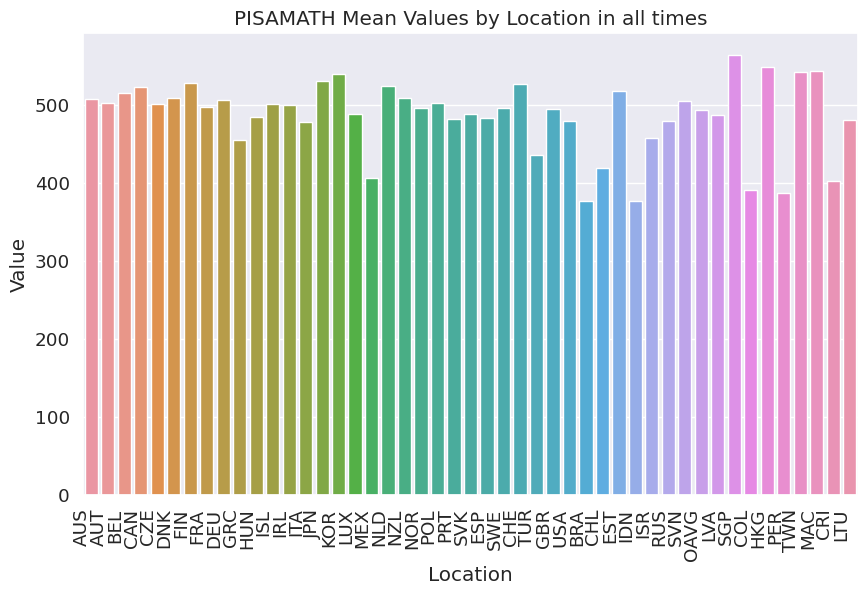

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='LOCATION', y='Value', data=mathDf)
plt.title('PISAMATH Mean Values by Location in all times')
plt.xlabel('Location')
plt.ylabel('Value')
plt.xticks(rotation=90, ha='right')
plt.savefig('/kaggle/working/PisaMathMeanValuesByLocation.png')
plt.show()


# 2.4 PISAREAD

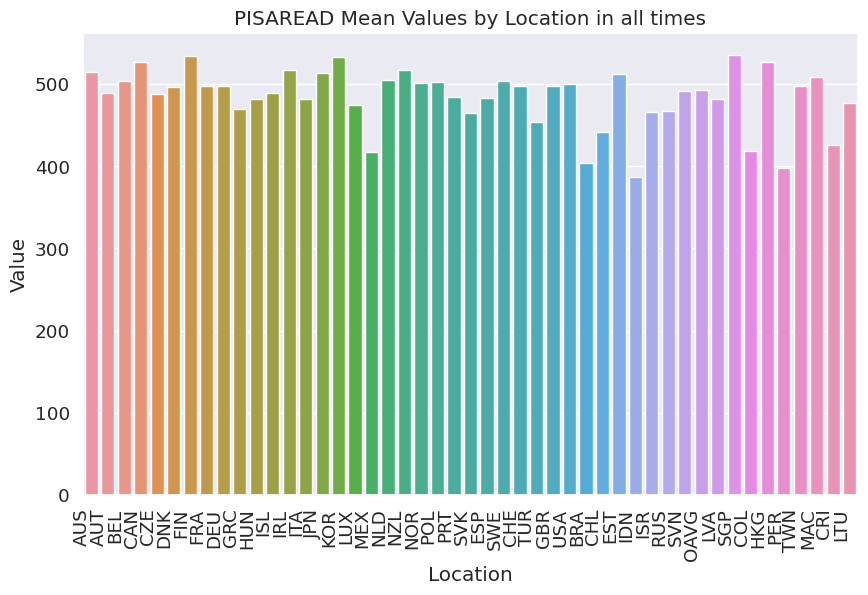

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='LOCATION', y='Value', data=readDf)
plt.title('PISAREAD Mean Values by Location in all times')
plt.xlabel('Location')
plt.ylabel('Value')
plt.xticks(rotation=90, ha='right')
plt.savefig('/kaggle/working/PisaReadMeanValuesByLocation.png')
plt.show()


# part 3 : Mean values for each indicators by Subject

In [16]:
pisaMathSub = df.loc[df["INDICATOR"] == "PISAMATH"][["SUBJECT", "Value"]]
pisaSciSub = df.loc[df["INDICATOR"] == "PISASCIENCE"][["SUBJECT","Value"]]
pisaReadSub = df.loc[df["INDICATOR"] == "PISAREAD"][["SUBJECT" , "Value"]]

In [17]:
mathBoyMean = pisaMathSub.loc[pisaMathSub["SUBJECT"] == "BOY"]["Value"].mean()
mathGirlMean = pisaMathSub.loc[pisaMathSub["SUBJECT"] == "GIRL"]["Value"].mean()

sciBoyMean = pisaSciSub.loc[pisaSciSub["SUBJECT"] == "BOY"]["Value"].mean()
sciGirlMean = pisaSciSub.loc[pisaSciSub["SUBJECT"] == "GIRL"]["Value"].mean()

readBoyMean = pisaReadSub.loc[pisaReadSub["SUBJECT"] == "BOY"]["Value"].mean()
readGirlMean = pisaReadSub.loc[pisaReadSub["SUBJECT"] == "GIRL"]["Value"].mean()

In [18]:
subMean = {"INDICATOR" : ["PISAMATH","PISAMATH","PISASCIENCE","PISASCIENCE","PISAREAD","PISAREAD"],
           "SUBJECT" : ["BOY","GIRL","BOY","GIRL","BOY","GIRL"], "MEAN VALUE" : [mathBoyMean,mathGirlMean,sciBoyMean,sciGirlMean,readBoyMean,
                                                                                readGirlMean] }
subMeanDf = pd.DataFrame(subMean)

<Figure size 1200x600 with 0 Axes>

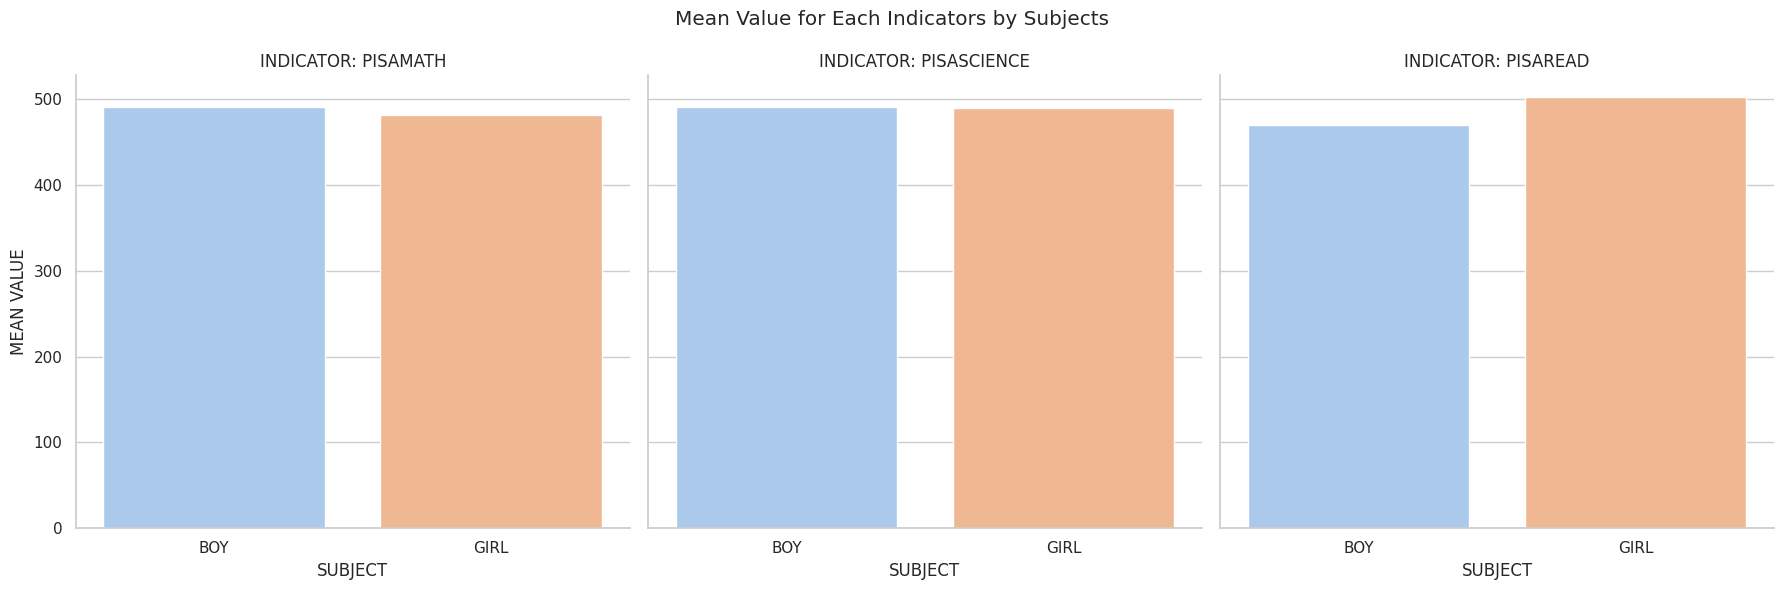

In [19]:
sns.set(style="whitegrid") 
plt.figure(figsize=(12, 6))  

g = sns.FacetGrid(subMeanDf, col="INDICATOR", height=6, col_wrap=3)
g.map(sns.barplot, "SUBJECT", "MEAN VALUE", order=["BOY", "GIRL"], palette="pastel")

plt.suptitle("Mean Value for Each Indicators by Subjects")

g.set_axis_labels("SUBJECT", "MEAN VALUE")
g.set_titles("INDICATOR: {col_name}")


g.tight_layout()


plt.savefig('/kaggle/working/MeanValueForEachIndicatorBySubjects.png')
plt.show()


# part 4 : Change in Mean Over Time Series 

In [20]:
pisaMathTime = df[df["INDICATOR"] == "PISAMATH"][["LOCATION","TIME","Value",]]
pisaReadTime = df[df["INDICATOR"] == "PISAREAD"][["LOCATION","TIME","Value"]]
pisaSciTime = df[df["INDICATOR"] == "PISASCIENCE"][["LOCATION","TIME", "Value"]]

# 4.1 Value Change Over Time in PISAMATH

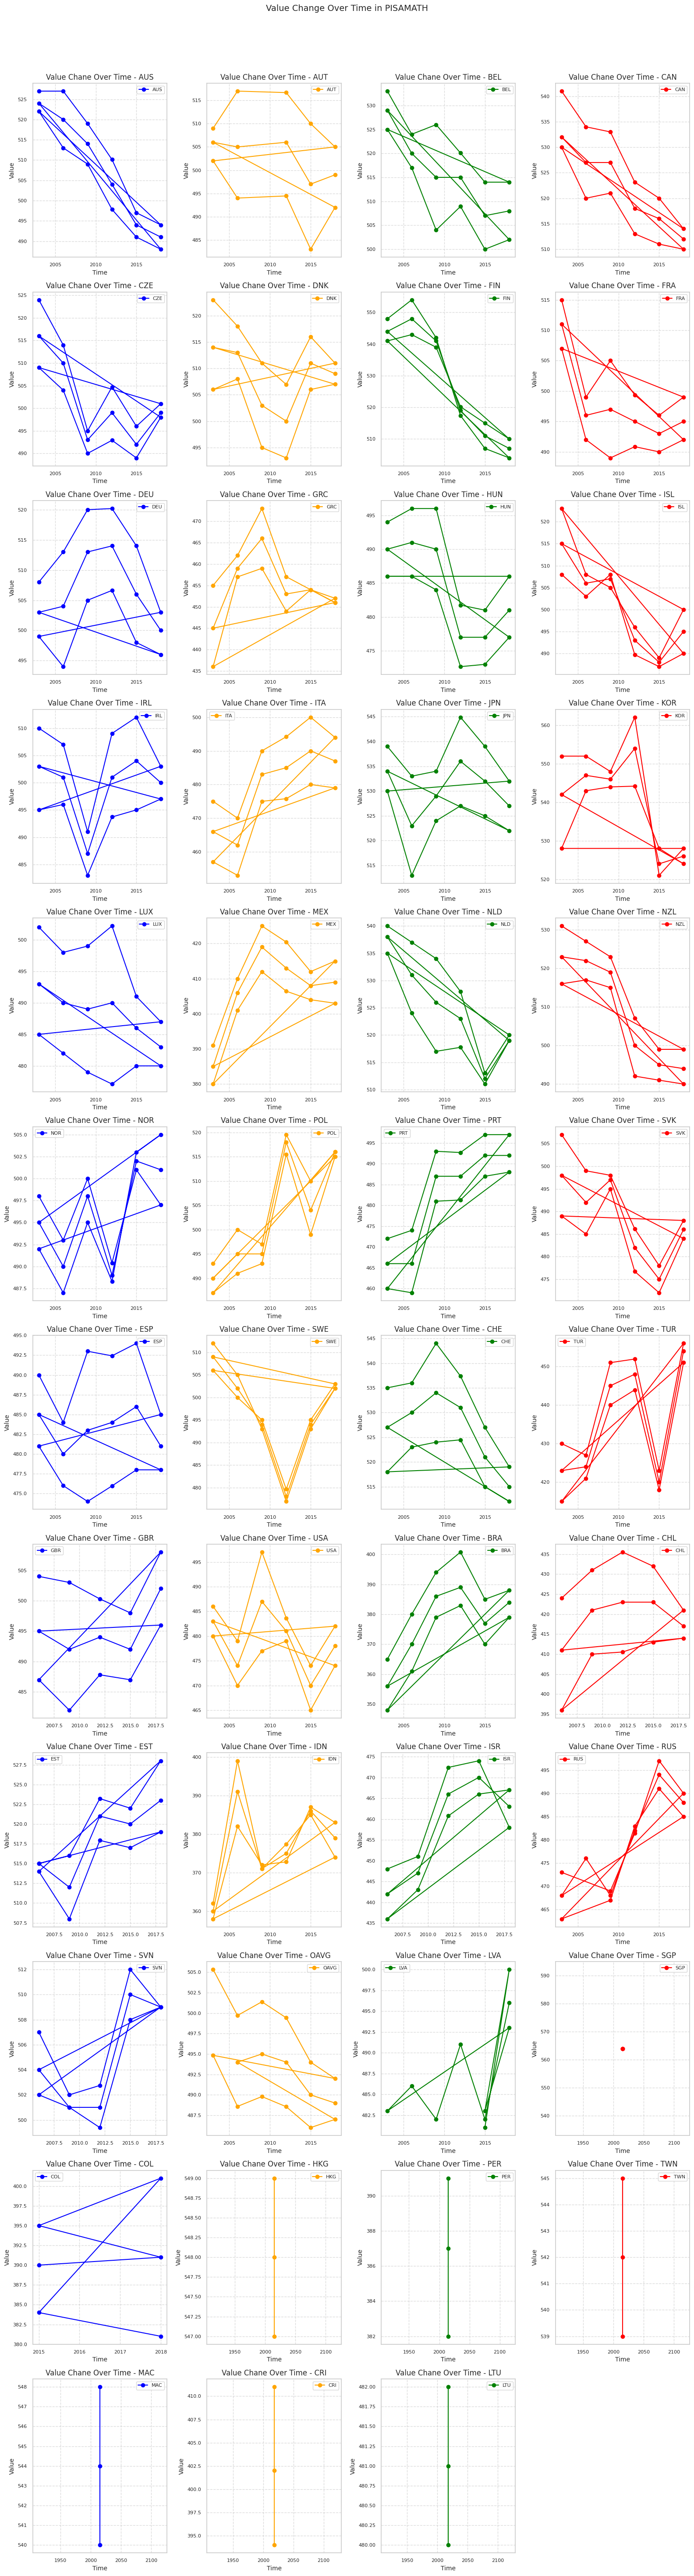

In [21]:

uniqueCountries = pisaMathTime['LOCATION'].unique()


colors = ['blue', 'orange', 'green', 'red']

groups = [uniqueCountries[i:i+4] for i in range(0, len(uniqueCountries), 4)]


plt.figure(figsize=(16, 5 * len(groups)))
for j, group in enumerate(groups):
    for i, country in enumerate(group):
        plt.subplot(len(groups), 4, j * 4 + i + 1)
        country_data = pisaMathTime[pisaMathTime['LOCATION'] == country]
        plt.plot(country_data['TIME'], country_data['Value'], label=country, marker='o', linestyle='-', color=colors[i])
        plt.title(f'Value Chane Over Time - {country}', fontsize=12)
        plt.xlabel('Time', fontsize=10)
        plt.ylabel('Value', fontsize=10)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        plt.legend(fontsize=8)
        plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Value Change Over Time in PISAMATH', fontsize=14)

plt.savefig('/kaggle/working/ValueChangeOverTimeInPisaMath.png')
plt.show()


# 4.2 Value Change Over Time in PISAREAD

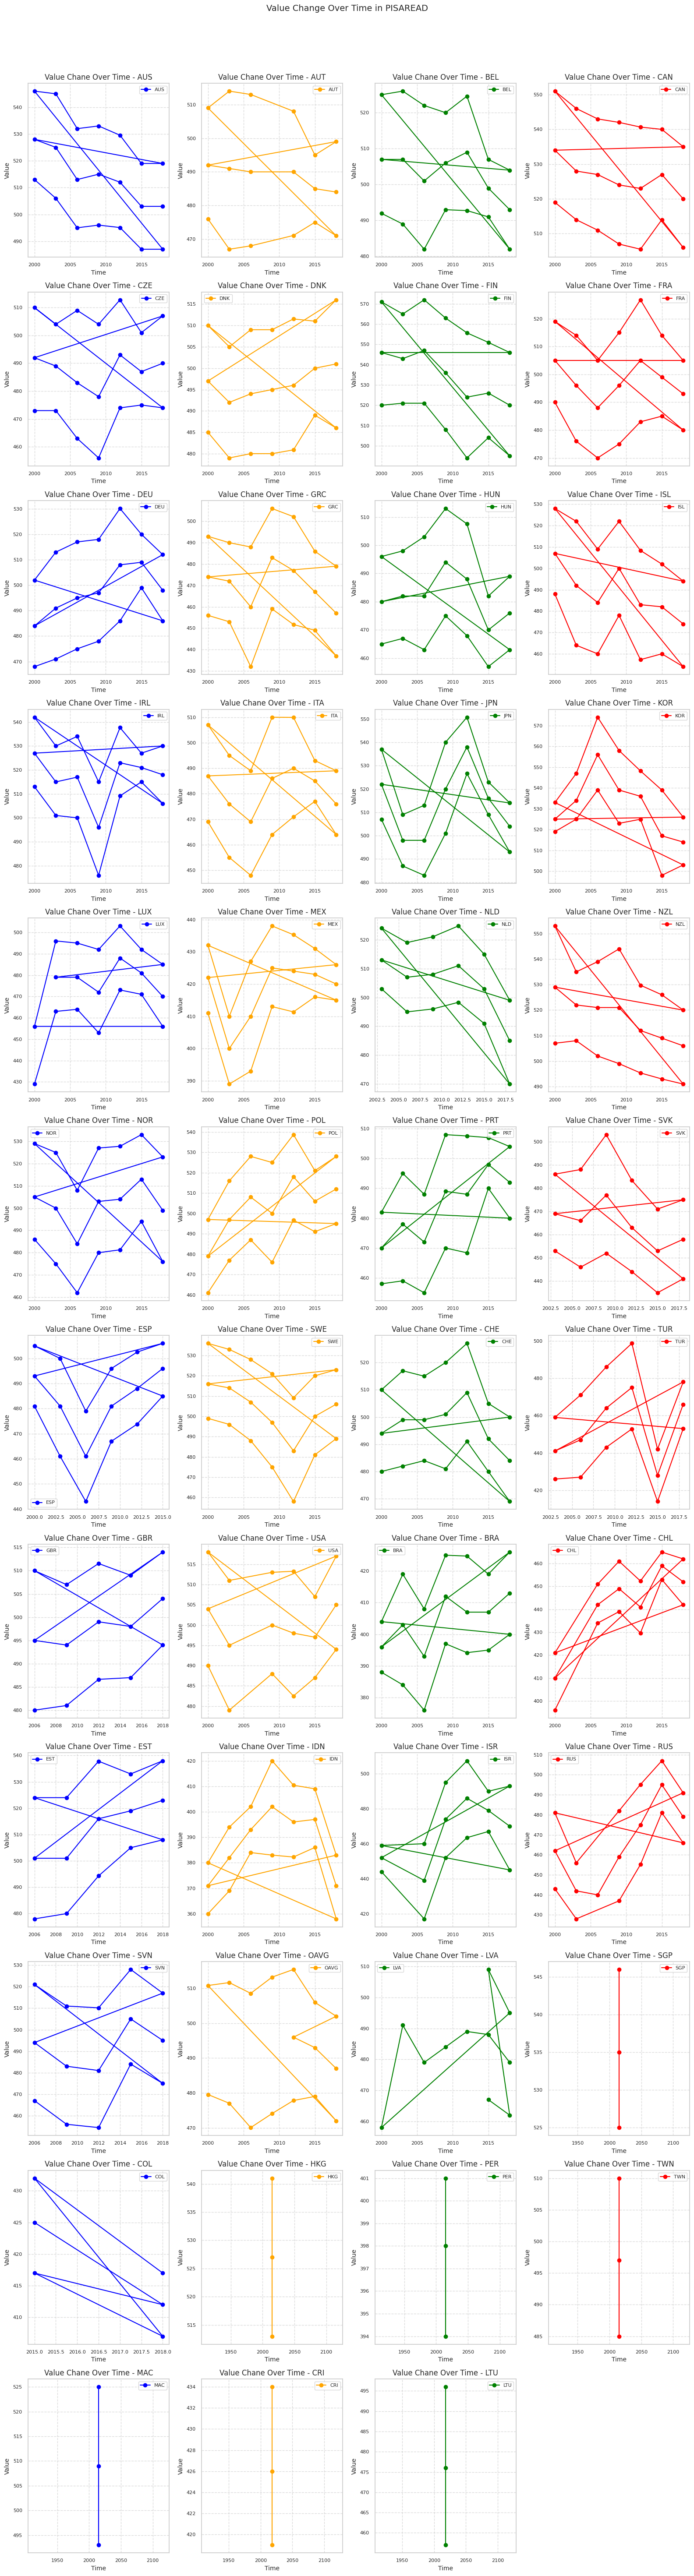

In [22]:

uniqueCountries = pisaReadTime['LOCATION'].unique()


colors = ['blue', 'orange', 'green', 'red']

groups = [uniqueCountries[i:i+4] for i in range(0, len(uniqueCountries), 4)]


plt.figure(figsize=(16, 5 * len(groups)))
for j, group in enumerate(groups):
    for i, country in enumerate(group):
        plt.subplot(len(groups), 4, j * 4 + i + 1)
        country_data = pisaReadTime[pisaReadTime['LOCATION'] == country]
        plt.plot(country_data['TIME'], country_data['Value'], label=country, marker='o', linestyle='-', color=colors[i])
        plt.title(f'Value Chane Over Time - {country}', fontsize=12)
        plt.xlabel('Time', fontsize=10)
        plt.ylabel('Value', fontsize=10)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        plt.legend(fontsize=8)
        plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Value Change Over Time in PISAREAD', fontsize=14)

plt.savefig('/kaggle/working/ValueChangeOverTimeInPisaRead.png')
plt.show()



# 4.3 Value Chane Over Time in PISASCIENCE

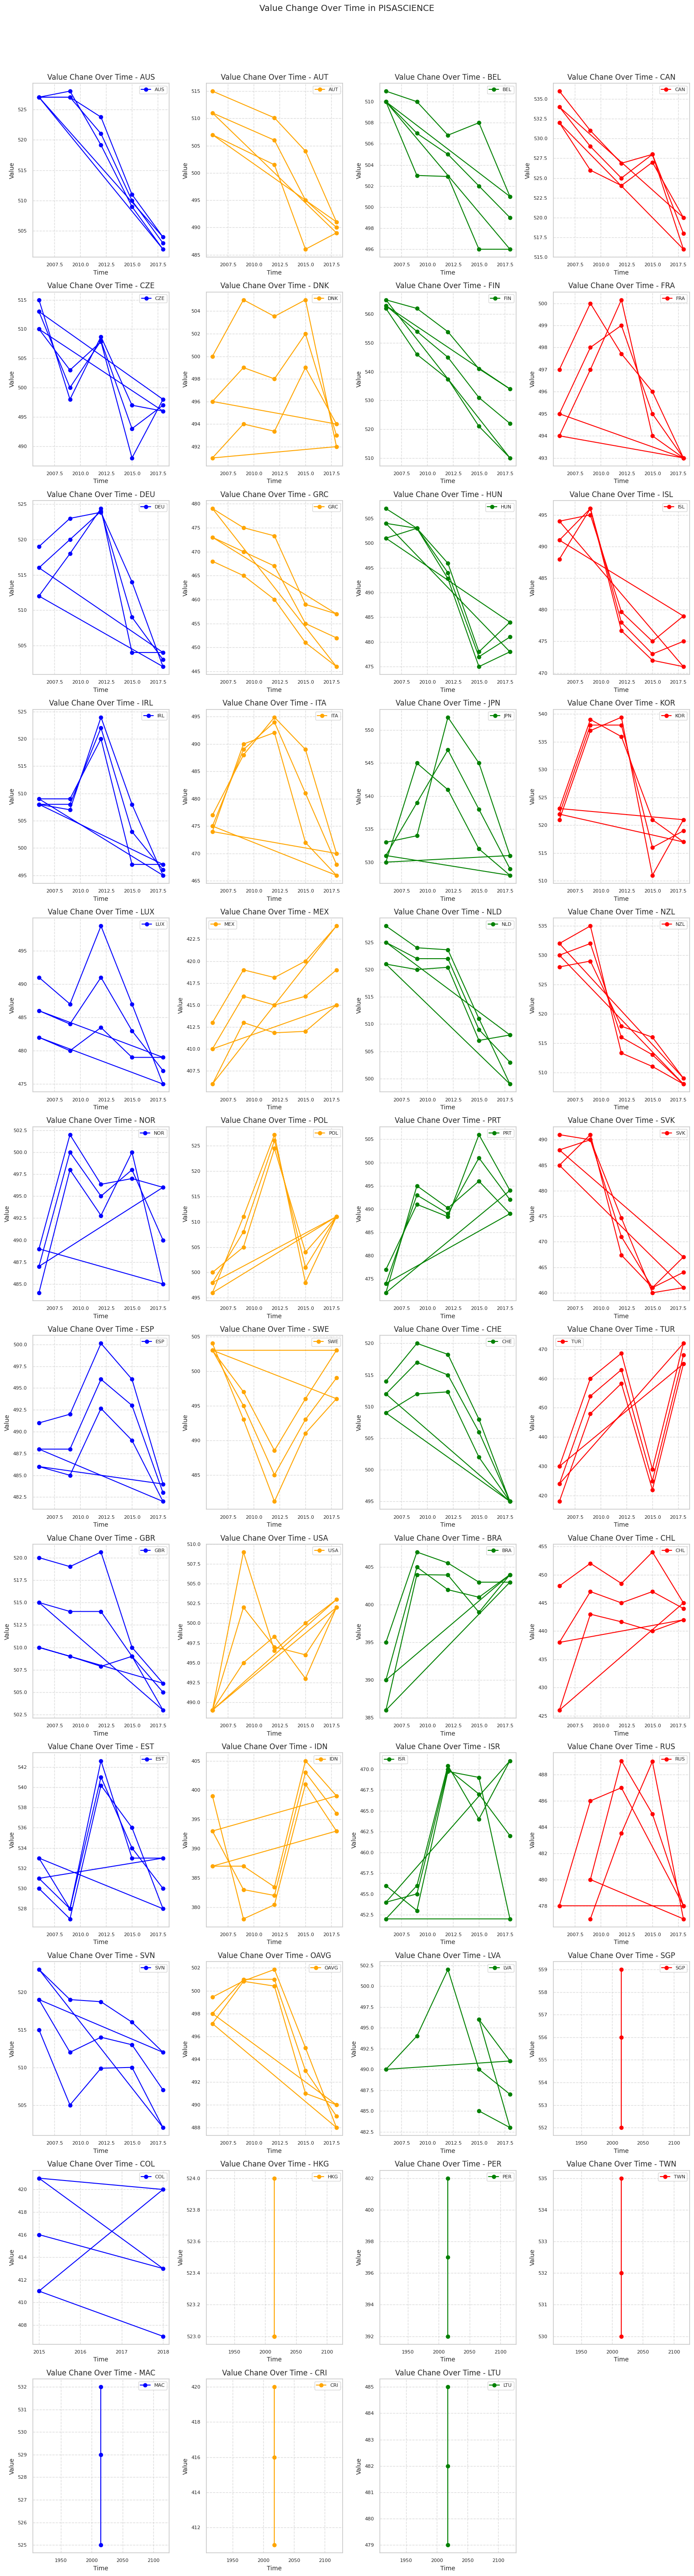

In [23]:

uniqueCountries = pisaSciTime['LOCATION'].unique()


colors = ['blue', 'orange', 'green', 'red']

groups = [uniqueCountries[i:i+4] for i in range(0, len(uniqueCountries), 4)]


plt.figure(figsize=(16, 5 * len(groups)))
for j, group in enumerate(groups):
    for i, country in enumerate(group):
        plt.subplot(len(groups), 4, j * 4 + i + 1)
        country_data = pisaSciTime[pisaSciTime['LOCATION'] == country]
        plt.plot(country_data['TIME'], country_data['Value'], label=country, marker='o', linestyle='-', color=colors[i])
        plt.title(f'Value Chane Over Time - {country}', fontsize=12)
        plt.xlabel('Time', fontsize=10)
        plt.ylabel('Value', fontsize=10)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        plt.legend(fontsize=8)
        plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Value Change Over Time in PISASCIENCE', fontsize=14)

plt.savefig('/kaggle/working/ValueChangeOverTimeInPisaScience.png')
plt.show()


# Part 5 : Regression Analysis

# 5.1 Create new Df for locatin AUS

In [24]:
ausDf = pd.DataFrame(columns=["Indicators","Time","Value"])

ausDf["Indicators"] = df.loc[df["LOCATION"] == "AUS"]["INDICATOR"]

ausDf["Time"] = df.loc[df["LOCATION"] == "AUS"]["TIME"]

ausDf["Value"] = df.loc[df["LOCATION"] == "AUS"]["Value"]

ausMathDf = ausDf.loc[ausDf["Indicators"] == "PISAMATH"].copy()
ausReadDf = ausDf.loc[ausDf["Indicators"] == "PISAREAD"].copy()
ausSciDf = ausDf.loc[ausDf["Indicators"] == "PISASCIENCE"].copy()
ausMathDf = ausMathDf.sort_values(by='Time')


# 5.2 PISAMATH Regression for AUS in 2019-2029

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


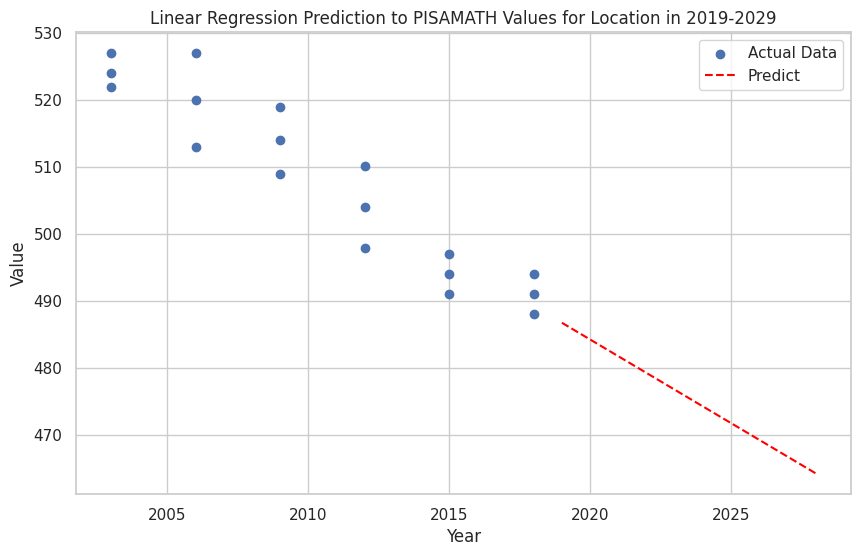

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = ausMathDf[['Time']]
y = ausMathDf['Value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

futureYears = np.arange(2019, 2029).reshape(-1, 1)
predictedValuesFuture = model.predict(futureYears)


futureDf = pd.DataFrame({'Time': futureYears.flatten(), 'Predicted_Value': predictedValuesFuture})


mergedDf = pd.merge(ausMathDf, futureDf, how='outer', on='Time')


plt.figure(figsize=(10, 6))
plt.scatter(ausMathDf['Time'], ausMathDf['Value'], label='Actual Data')
plt.plot(mergedDf['Time'], mergedDf['Predicted_Value'], label='Predict', linestyle='--', color='red')
plt.title('Linear Regression Prediction to PISAMATH Values for Location in 2019-2029')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.savefig('/kaggle/working/regressionValuesPisaMath.png')
plt.show()

# 5.3 PISAREAD Regression for AUS in 2019-2029

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


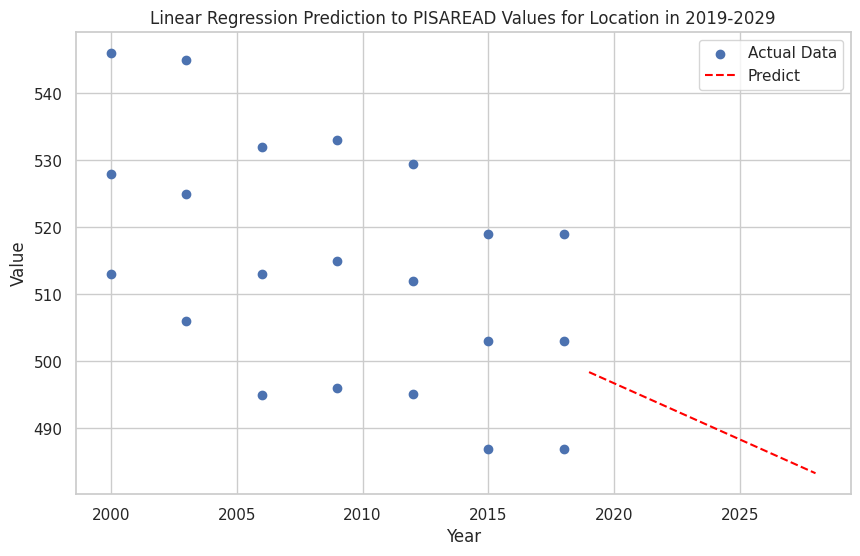

In [26]:
X = ausReadDf[['Time']]
y = ausReadDf['Value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

futureYears = np.arange(2019, 2029).reshape(-1, 1)
predictedValuesFuture = model.predict(futureYears)


futureDf = pd.DataFrame({'Time': futureYears.flatten(), 'Predicted_Value': predictedValuesFuture})


mergedDf = pd.merge(ausReadDf, futureDf, how='outer', on='Time')


plt.figure(figsize=(10, 6))
plt.scatter(ausReadDf['Time'], ausReadDf['Value'], label='Actual Data')
plt.plot(mergedDf['Time'], mergedDf['Predicted_Value'], label='Predict', linestyle='--', color='red')
plt.title('Linear Regression Prediction to PISAREAD Values for Location in 2019-2029')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.savefig('/kaggle/working/regressionValuesPisaRead.png')
plt.show()

# 5.4 PISASCIENCE Regression for AUS in 2019-2029

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


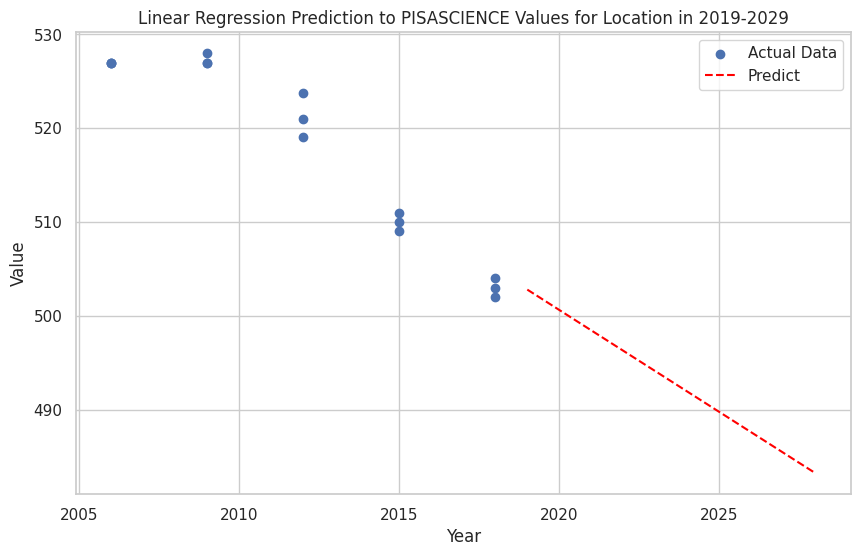

In [27]:
X = ausSciDf[['Time']]
y = ausSciDf['Value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

futureYears = np.arange(2019, 2029).reshape(-1, 1)
predictedValuesFuture = model.predict(futureYears)


futureDf = pd.DataFrame({'Time': futureYears.flatten(), 'Predicted_Value': predictedValuesFuture})


mergedDf = pd.merge(ausSciDf, futureDf, how='outer', on='Time')


plt.figure(figsize=(10, 6))
plt.scatter(ausSciDf['Time'], ausSciDf['Value'], label='Actual Data')
plt.plot(mergedDf['Time'], mergedDf['Predicted_Value'], label='Predict', linestyle='--', color='red')
plt.title('Linear Regression Prediction to PISASCIENCE Values for Location in 2019-2029')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.savefig('/kaggle/working/regressionValuesPisaScience.png')
plt.show()